In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data\\mouse_drug_data.csv"
clinical_trial_data_to_load = "data\\clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clin = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_clin, df_mouse, on = "Mouse ID", how = "outer")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df2 = df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
df3 = pd.DataFrame(df2["Tumor Volume (mm3)"].mean())

df3["Drug"] = [i[0] for i in df3.index]
df3["Timepoint"] =[i[1] for i in df3.index]

# Preview DataFrame
df3 = df3.reset_index(drop = True)


df3.head()

,Tumor Volume (mm3),Drug,Timepoint
0,45.000000,Capomulin,0
1,44.266086,Capomulin,5
2,43.084291,Capomulin,10
3,42.064317,Capomulin,15
4,40.716325,Capomulin,20


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df4 = pd.DataFrame(df2["Tumor Volume (mm3)"].sem())

# Convert to DataFrame
df4["Drug"] = [i[0] for i in df4.index]
df4["Timepoint"] =[i[1] for i in df4.index]

# Preview DataFrame
df4.head()


Tumor Volume (mm3)       Drug  Timepoint
Drug      Timepoint                                          
Capomulin 0                    0.000000  Capomulin          0
          5                    0.448593  Capomulin          5
          10                   0.702684  Capomulin         10
          15                   0.838617  Capomulin         15
          20                   0.909731  Capomulin         20

In [4]:
# Minor Data Munging to Re-Format the Data Frames
df5 = df3.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df5

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


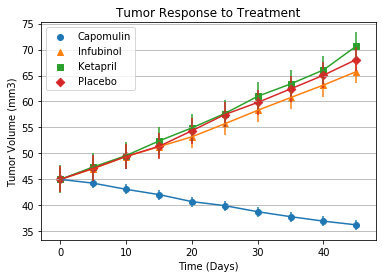

In [5]:
column_of_interest = ["Capomulin","Infubinol","Ketapril","Placebo"]
markers = ["o","^","s","D"]
df6 = df5[column_of_interest]
df6["Time (Days)"] = df6.index


j=0

for i in column_of_interest:
    plt.scatter(x = df6["Time (Days)"], y = df6[i],marker=markers[j])
    plt.errorbar(x = df6["Time (Days)"], y = df6[i], yerr = stats.sem(df6[i]))
    j = j +1

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(axis = "y")
plt.legend(column_of_interest, loc = "upper left")

plt.savefig("Graph1_TumorResponseToTreatment.png")
plt.show()

In [6]:
# Show the Figure


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df7 = df[df["Drug"].isin(column_of_interest)]
df8 = df7.groupby(["Drug","Timepoint"])


# Convert to DataFrame
df9 = df8["Metastatic Sites"].mean().to_frame()
type(df9)
# Preview DataFrame
df9.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df10 = df[df["Drug"].isin(column_of_interest)]
df11 = df10.groupby(["Drug","Timepoint"])

# Convert to DataFrame
df12 = df11["Metastatic Sites"].sem().to_frame()
# Preview DataFrame
df12.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
df9["Drug"] = [i[0] for i in df9.index]
df9["Timepoint"] = [i[1] for i in df9.index]
df9 = df9.reset_index(drop = True)

# Preview that Reformatting worked


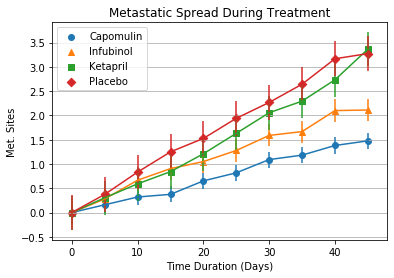

In [10]:
# Generate the Plot (with Error Bars)
df13 = df9.pivot(index="Timepoint",columns= "Drug", values = "Metastatic Sites")
df13["Timepoint"] =df13.index

j=0

for i in column_of_interest:
    plt.scatter(x = df13["Timepoint"], y = df13[i],marker=markers[j])
    plt.errorbar(x = df13["Timepoint"], y = df13[i], yerr = stats.sem(df13[i]))
    j = j +1

plt.xlabel("Time Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid(axis = "y")
plt.legend(column_of_interest, loc = "upper left")

# Save the Figure
plt.savefig("Graph2_MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df14 = df.groupby(["Drug","Timepoint"])
df15 = df14["Mouse ID"].count().to_frame()

# Convert to DataFrame
df15["Drug"] = [i[0] for i in df15.index]
df15["Timepoint"] = [i[1] for i in df15.index]
df15.columns = ["Mouse Count","Drug","Timepoint"]
df15 = df15.reset_index(drop = True)

# Preview DataFrame
df15.head()


,Mouse Count,Drug,Timepoint
0,25,Capomulin,0
1,25,Capomulin,5
2,25,Capomulin,10
3,24,Capomulin,15
4,23,Capomulin,20


In [12]:
# Minor Data Munging to Re-Format the Data Frames
df16 = df15.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
df16["Timepoint"] = df16.index

# Preview the Data Frame
df16.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Timepoint
Timepoint,,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25,0
5,25,21,25,23,23,24,25,25,25,24,5
10,25,20,21,22,21,24,23,24,23,22,10
15,24,19,21,19,21,20,17,24,23,21,15
20,23,18,20,19,20,19,17,23,21,17,20


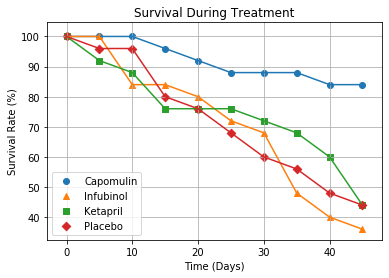

In [13]:
# Generate the Plot (Accounting for percentages)
j=0

for i in column_of_interest:
    plt.scatter(x = df16["Timepoint"], y = 100* df16[i]/df16[i][0],marker=markers[j])
    plt.errorbar(x = df16["Timepoint"], y = 100* df16[i]/df16[i][0])
    j = j +1

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.grid(axis = "both")
plt.legend(column_of_interest, loc = "lower left")
    
# Save the Figure
plt.savefig("Graph3_SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
pct_change = 100 *(df5.iloc[-1]/df5.iloc[0] - 1)
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

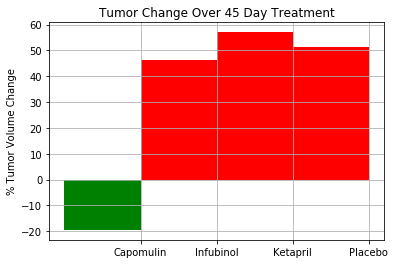

In [15]:
# Store all Relevant Percent Changes into a Tuple
interest = pct_change[pct_change.index.isin(column_of_interest)]

# Splice the data between passing and failing drugs
mask1 = interest>0
mask2 = interest<=0

plt.bar(np.arange(0,4)[mask1], interest[mask1],color="red",width=1.0)
plt.bar(np.arange(0,4)[mask2], interest[mask2],color="green",width=1.0)

# Orient widths. Add labels, tick marks, etc. 
plt.xticks([0.5,1.5,2.5,3.5],interest.index)

# Use functions to label the percentages of changes
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(axis = "both")

# Call functions to implement the function calls
# Save the Figure

plt.savefig("Graph4_TumorChangeOver45Days.png")

# Show the Figure
plt.show()

Trend:
1. Capmoulin seems like an effective way to treat brain tumors
2. Placebo is ironically better than some treatments. This means doing nothing is better than some treatments like Ketapril
3. Ramicane is the only other treatment than Capmoulin that leads to a decrease in tumor volume. all others are increasing the volume.